# HTCondor JobSubmission Demo

## Submiting a test job

In [1]:
from htcondor_utilities import run_testjob, check_htcondor_status, check_output, get_output

In [2]:
run_testjob(submit=False)

A test case with the following parameters:
Ehtdata:  torus.out0.05992.h5,torus.out0.05993.h5,torus.out0.05994.h5,torus.out0.05995.h5,torus.out0.05996.h5
Rhigh-Ratio:  10:100:10
Theta-Viewing-Angle:  30,50,60,70,80,90
Rho0-Density-Normalization:  4.266338570441294e+17




total jobs:  300
ready to submit


## Check the job status

In [3]:
status = check_htcondor_status()

JobID: 70, Total: 300, Submit Time: 2/27 09:31
status report 61.33% done @ 02/29 10:21
Done - 184:  ****************************************************************************************************************************************************************************************
Run - 112:  ****************************************************************************************************************
Idle - 0:  
Hold - 4:  ****


## Check the output

In [3]:
h5list = check_output()
print(f"Total output: {len(h5list)}")
print(h5list)

Total output: 202
['img_s05992_Rh100_i60.h5', 'img_s05992_Rh100_i70.h5', 'img_s05992_Rh100_i90.h5', 'img_s05992_Rh10_i60.h5', 'img_s05992_Rh30_i60.h5', 'img_s05992_Rh30_i70.h5', 'img_s05992_Rh30_i90.h5', 'img_s05992_Rh40_i30.h5', 'img_s05992_Rh40_i50.h5', 'img_s05992_Rh40_i60.h5', 'img_s05992_Rh40_i70.h5', 'img_s05992_Rh40_i80.h5', 'img_s05992_Rh40_i90.h5', 'img_s05992_Rh50_i50.h5', 'img_s05992_Rh50_i60.h5', 'img_s05992_Rh50_i70.h5', 'img_s05992_Rh50_i80.h5', 'img_s05992_Rh60_i60.h5', 'img_s05992_Rh60_i70.h5', 'img_s05992_Rh60_i90.h5', 'img_s05992_Rh70_i30.h5', 'img_s05992_Rh70_i50.h5', 'img_s05992_Rh70_i60.h5', 'img_s05992_Rh80_i50.h5', 'img_s05992_Rh80_i60.h5', 'img_s05992_Rh80_i70.h5', 'img_s05992_Rh80_i80.h5', 'img_s05992_Rh80_i90.h5', 'img_s05992_Rh90_i30.h5', 'img_s05992_Rh90_i50.h5', 'img_s05992_Rh90_i70.h5', 'img_s05992_Rh90_i90.h5', 'img_s05993_Rh100_i50.h5', 'img_s05993_Rh100_i60.h5', 'img_s05993_Rh100_i70.h5', 'img_s05993_Rh100_i80.h5', 'img_s05993_Rh10_i30.h5', 'img_s05993_

## Get the output

In [4]:
# download the first output as an example
# the file is downloaded to the current local dir
get_output(h5list[0])

/home/cicuser/Projects/eht_gateway/img_s05992_Rh100_i60.h5
File transfer successful!


In [5]:
# plot the file
import h5py
import matplotlib.pyplot as plt
import numpy as np

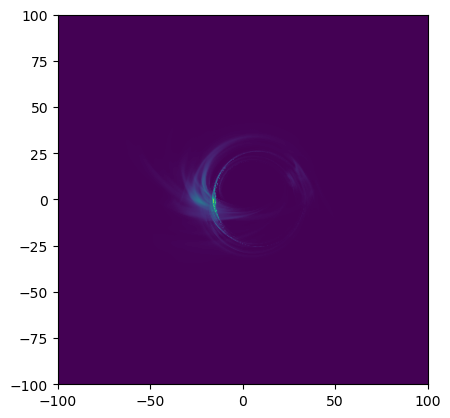

In [6]:
h5file = h5list[0]
hfp = h5py.File(h5file,'r')
dx_cgs = hfp['header']['camera']['dx'][()] * hfp['header']['units']['L_unit'][()]
fovMuas = dx_cgs / hfp['header']['dsource'][()] * 2.06265e11
cgsToJy = hfp['header']['scale'][()]
unpol = np.copy(hfp['unpol']).transpose((1,0)) * cgsToJy
hfp.close()

# make plot and show
ext = [ -fovMuas/2, fovMuas/2, -fovMuas/2, fovMuas/2 ]
plt.imshow(unpol, origin='lower', extent=ext)
plt.show()